<H2>
    Introduction to matplotlib.pyplot
</H2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Basic Plots**

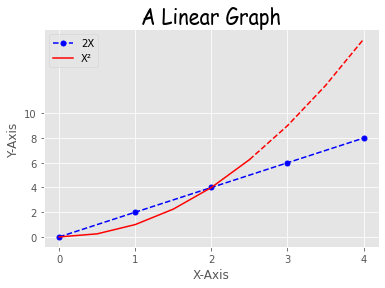

In [2]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your graph (dpi specifies pixels per inch, when saving probably should use 300 if possible)

plt.style.use('ggplot')
# plt.figure(figsize = (5, 3), dpi =100)

## Line 1


#Keyword Argument Notation
plt.plot(x,y, label = "2X", color ="blue", marker = ".", linestyle = "--", markersize = 10, markeredgecolor = "blue")

# shorthand of the above: color, marker, line
# plt.plot(x, y, "b.--", label = "2X")

## Line Number 2

# select interval we want to plot point at
x2 = np.arange(0, 4.5, 0.5)

# plot first part of the line
plt.plot(x2[:6], x2[:6]**2, "r", label = "X²")

# plot the remainder part of the line
plt.plot(x2[5:], x2[5:]**2, "r--")

# Add a title (specify font parameters with fontdict() 
plt.title("A Linear Graph", fontdict={'fontname':'Comic Sans MS', 'fontsize':20})

# Define x and y labels
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

# plot tickers to avoid decimals
plt.yticks([0,2,4,6,8,10])
plt.xticks([0,1,2,3,4])

# show labels on the graph
plt.legend()

# save plot as png file
# plt.savefig("linearGraph.png")

plt.show()

**Basic Bar Plots**

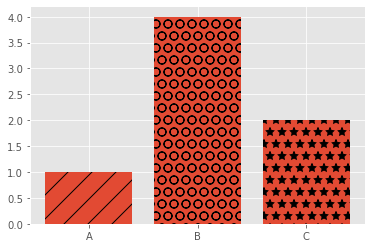

In [3]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

plt.style.use('ggplot')
bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for i, bar in enumerate(bars, start=0):
    #bar.set_hatch(patterns[i])
    bar.set_hatch(patterns.pop(0))

    

# bars[0].set_hatch('/')
# bars[1].set_hatch('O')
# bars[2].set_hatch('*')

# plt.figure(figsize=(6,4))
# plt.savefig('barplot.png', dpi = 300)
plt.show()

## Real World Examples

**Line Graph**

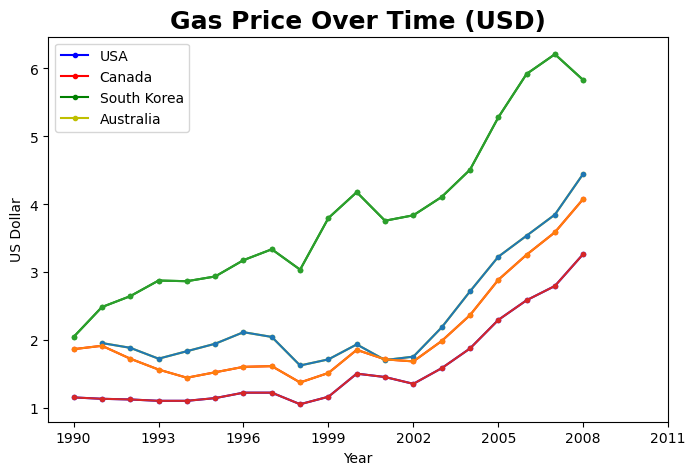

In [17]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8, 5))

plt.title('Gas Price Over Time (USD)', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas.Year, gas.Australia, 'y.-', label='Australia')

# Another way to plot multiple values
countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas.Year, gas[country], marker='.')
        
# print(gas.Year[::3])

plt.xticks(gas.Year[::3].tolist() + [2011]) # this include the year 2011 in the x axis

plt.xlabel('Year')
plt.ylabel('US Dollar')

plt.legend()

plt.savefig('gasPriceFigure.png')

plt.show()

**Histogram**

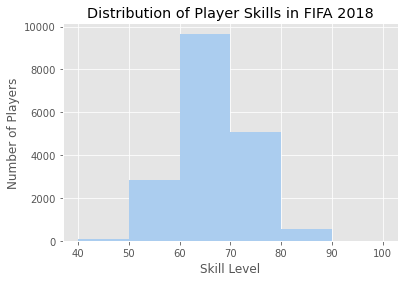

In [6]:
fifa = pd.read_csv('fifa_data.csv')

bins = [40, 50, 60, 70, 80, 90, 100]

plt.hist(fifa.Overall, bins=bins, color = '#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.show()

**Pie Chart-01**

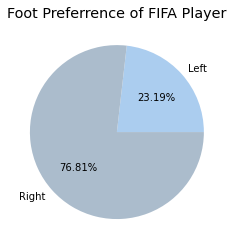

In [9]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#abbccc']
          
plt.pie([left, right], labels = labels, colors = colors, autopct="%.2f%%")

plt.title('Foot Preferrence of FIFA Player')
          
plt.show() 

**Pie Chart-02**

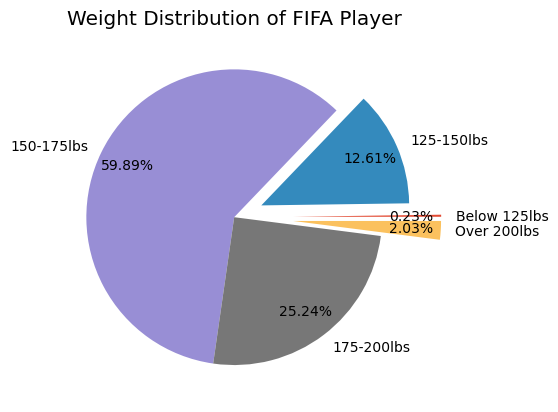

In [30]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa['Weight'] < 125].count()[0]
light_medium = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count()[0]
medium = fifa[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count()[0]
medium_heavy = fifa[(fifa['Weight'] >= 175) & (fifa['Weight'] < 200)].count()[0]
heavy = fifa[(fifa['Weight'] > 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Below 125lbs', '125-150lbs', '150-175lbs', '175-200lbs', 'Over 200lbs']
explode = (.4, .2, 0, 0., .4)

plt.title('Weight Distribution of FIFA Player')

plt.pie(weights, labels = labels, autopct = '%.2f%%', pctdistance = 0.8, explode = explode)

plt.show()

**BoxPlot**

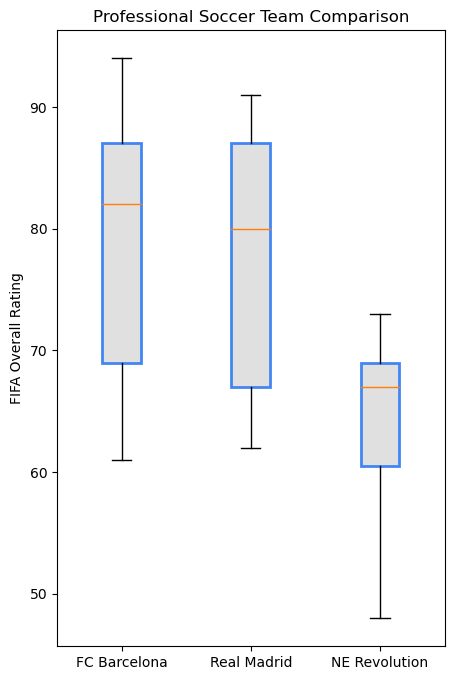

In [32]:
plt.style.use('default')

plt.figure(figsize=(5,8))

barcelona = fifa[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa[fifa.Club == 'Real Madrid']['Overall']
revs = fifa[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'NE Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True)

for box in boxes['boxes']:
    # set edge color
    box.set(color = '#4286f4', linewidth=2)
    
    # change fill color
    box.set(facecolor='#e0e0e0')
    
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()